# CloudWalk Case

**Created by** : Nilson Romero Michiles Junior


 
## Problem Description

### Analyze the data provided and present your conclusions. What suspicious behaviors did you find? What led you to this conclusion?

Dealing with payment frameworks requires that the Authorizing party has ways to identify and prevent frauds. In that case, there are two major points that the authorizer party have to think when deploy a antifraud control: 

- Point 1: - Calculate the trade off to don´t increase to much the burocracy, in a way that can affect the costumer xperience.


- Point 2: - Increase the acurracy of the model, however taking care to measure the a minimum level of false positives, considering that a many false positives means less sellings.

For sure there are many more cases thar we need to observe, like responsiviness, velocity, but this would extend to much this analysis.

#### Dataset

For this case it was diponibilized a dataset with 3.199 registries of card transactions.  The featrues included are presented below:

- **User_id**: id of the cardholders
- **Device_id**: divide used by the cardholder
- **Card Number**: Annonymized card number.
- **transaction_id**: Transaction id unique number.
- **merchant_id**: Merchant id unique number. 
- **transaction_date**: Date that the transaction happened.
- **transaction_amount**: monetary value o the transaction.
- **Has_cbk**: transaction received a fraud chargeback or not,

### 2. In addition to the spreadsheet data, what other data would you consider to find patterns of possible fraudulent behavior?


For a good understand about the data, it´s necessary a good exploratory analysis. There are only 8 features, but it´s possible to get a lot of insights.

In [100]:
#importing tools
import pandas as pd
import pandas_profiling
import plotly
import plotly.offline as py
import pandas as pd
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
import plotly.io as pio
from pandas_profiling.profile_report import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df = pd.read_csv('D:/1-PROJETO RUTGERS/Cloudwalk/transactional-sample.csv')

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB


Pandas profilling is a important tool to give a initial explanation about the data and potential correlations, missing values and details the variables. As can be seen, only the device id has missing values and card number has some repeated numbers.

In [4]:
# Estatistical Descripiton Analysis about the data
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Before deal with the dataset, it will be necessary treat some data, i order to let more understandable for the models.

In [101]:
#treating features

# transforming has_cbk to integer
df[df['has_cbk'] == True]['has_cbk'] = 1
df[df['has_cbk'] == False]['has_cbk'] = 0
df['has_cbk'] = df['has_cbk'].astype(float)


#transforming the datetime values
df['time'] = pd.to_datetime(df['transaction_date'])
df['date'] = df.time.dt.date
df['hour'] = df.time.dt.hour

#setting null device_id as -1, in order to don´t exclude this data and 
#considering the data is small
df.device_id[df.device_id.isna() == 1] = -1

#treating the date
for d in range(len(df.date)):
    df.date[d] = str(df.time.dt.date[d]).replace('-','')
df.date = df.date.astype(float)

#treating credit card number to put as number, without *
df.card_number = df.card_number.str.replace('*','') 


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      3199 non-null   int64         
 1   merchant_id         3199 non-null   int64         
 2   user_id             3199 non-null   int64         
 3   card_number         3199 non-null   object        
 4   transaction_date    3199 non-null   object        
 5   transaction_amount  3199 non-null   float64       
 6   device_id           3199 non-null   float64       
 7   has_cbk             3199 non-null   float64       
 8   time                3199 non-null   datetime64[ns]
 9   date                3199 non-null   object        
 10  hour                3199 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 275.0+ KB


In [8]:
MissingValues =df.isnull().sum().rename_axis('Colunas').reset_index(name='Missing Values')
MissingValues

Colunas  Missing Values
0       transaction_id               0
1          merchant_id               0
2              user_id               0
3          card_number               0
4     transaction_date               0
5   transaction_amount               0
6            device_id               0
7              has_cbk               0
8                 time               0
9                 date               0
10                hour               0

A second analysis consider the distribution of the data. In this step is used the distribution of the whole data and in the next step some consideration in the fraud labeled data. 

array([[<AxesSubplot:title={'center':'transaction_id'}>,
        <AxesSubplot:title={'center':'merchant_id'}>,
        <AxesSubplot:title={'center':'user_id'}>],
       [<AxesSubplot:title={'center':'transaction_amount'}>,
        <AxesSubplot:title={'center':'device_id'}>,
        <AxesSubplot:title={'center':'has_cbk'}>],
       [<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'amount_log'}>,
        <AxesSubplot:title={'center':'amount_scaled'}>,
        <AxesSubplot:title={'center':'amount_minmax'}>]], dtype=object)

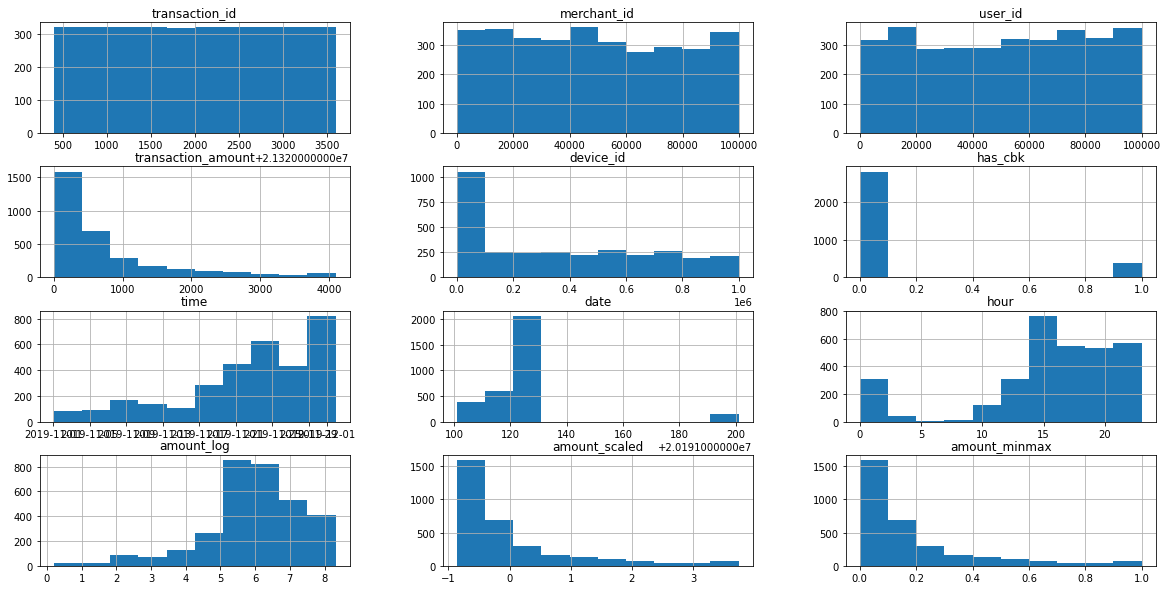

In [102]:
# analysing the data by histograms
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(20,10))

It can be verified that the variable "has_cbk" has a small number of chargebacks (=1), what suggest us that this database is very unballanced, but this is not a new thing when we see fraud datasets.

When looked the correlation (heatmap figure bellow), it´s possible to see that the correlation between the variables are weak, what it doesn't help in the understanding of potential behaviors.

<AxesSubplot:>

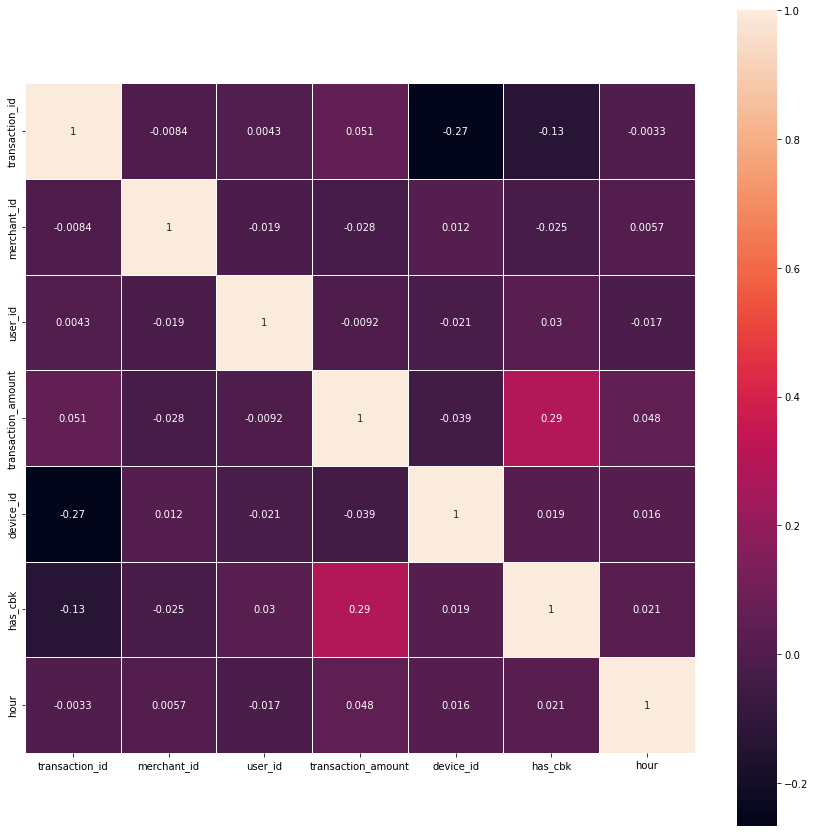

In [11]:
# Correlação das variáveis numéricas
import seaborn as sns

plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), square=True, annot=True, linewidth=0.5)

Getting a better details abou the trasaction ammount distribuition(bellow), and considering the histogram, can be seen that the mean is higher than the median, showing that you that some higher values at the end of distribution, but most part have a small value. 

From now, we will look the behavior of fraud transactions and normal/genuine transactions. Below, when we consider the proportion of fraud transactions bellow or above the median, can be see that most part happens in ammounts above the median.

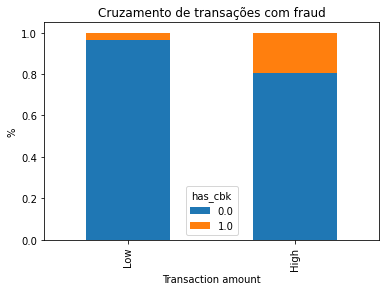

In [99]:
dfWithBin = df.copy()
bins=[0,415,3199] 
group=['Low','High'] 
dfWithBin['Amount_bin']=pd.cut(dfWithBin['transaction_amount'],bins,labels=group)
fbin=pd.crosstab(dfWithBin['Amount_bin'],dfWithBin['has_cbk'])
fbin.div(fbin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Cruzamento de transações com fraud')
plt.xlabel('Transaction amount')
P= plt.ylabel('%')

In [20]:
#getting a better details about the ammount distribuition. 
df.transaction_amount.describe() 

count    3199.000000
mean      767.812904
std       889.095904
min         1.220000
25%       205.235000
50%       415.940000
75%       981.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In [21]:
#getting the distribution of transaction details of fraud transactions
df[df.has_cbk == 1 ].transaction_amount.describe()

count     391.000000
mean     1453.571918
std      1169.491346
min         2.890000
25%       565.580000
50%       999.470000
75%      2140.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In the same way, the distribution of fraudulent transactions have a normal distribution with a higher standard desviation, showing a dificult to find some pattern.  

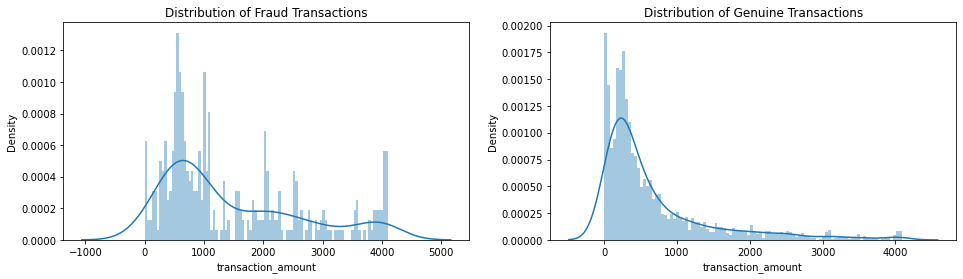

In [103]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['has_cbk'] == 1]['transaction_amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['has_cbk'] == 0]['transaction_amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

When consider the possibility of using repeated values, it can be seen that this not the case. It was found only one case with repeated values, but is a point that should be observed.

In [78]:
print("Fraud Transaction distribution : \n",df[(df['has_cbk'] == 1)]['transaction_amount'].value_counts().head(10))
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['has_cbk'] == 1)]['transaction_amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['has_cbk'] == 1)]['transaction_amount'].min())

Fraud Transaction distribution : 
 4028.55    2
734.87     1
3936.39    1
4055.58    1
3883.04    1
2038.61    1
1754.77    1
1908.33    1
2074.47    1
908.75     1
Name: transaction_amount, dtype: int64


Maximum amount of fraud transaction -  4097.21
Minimum amount of fraud transaction -  2.89


Another visualization of the amount of fraud transactions using box plot. Here we can see better the distribution of the percentiles in each case.

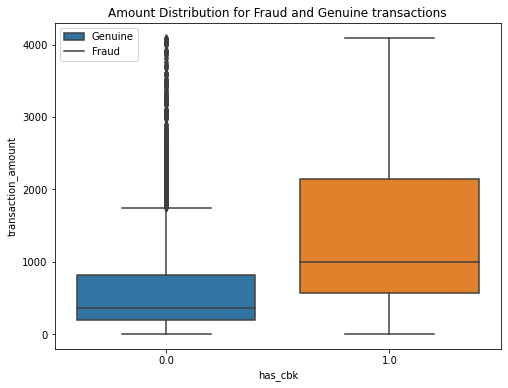

In [98]:


plt.figure(figsize=(8,6))
sns.boxplot(x='has_cbk', y='transaction_amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.legend(["Genuine", "Fraud"])
plt.show()

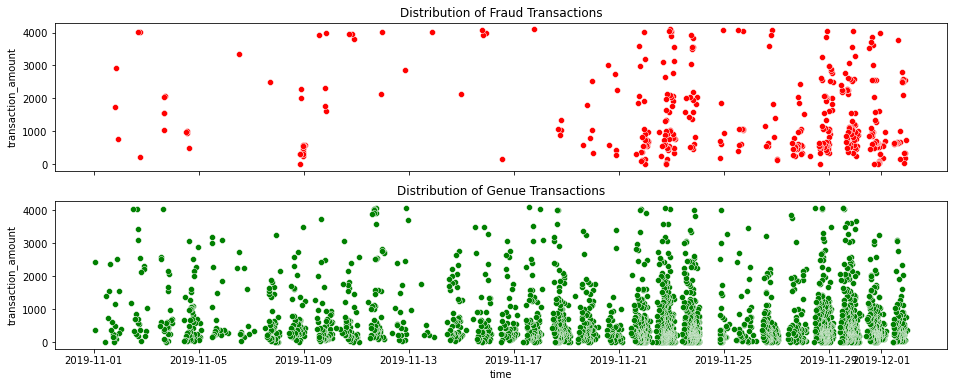

In [95]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='time',y='transaction_amount', data=df[df['has_cbk']==1], color = 'red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='time',y='transaction_amount', data=df[df['has_cbk']==0], color='green',ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

**Highlights**

Most the transaction amount falls between 0 and about 1000 and we have some outliers for really big amount transactions, above 2000. When looked the fraud chargebacks has a higher ticket, where most part is above 1000. So we can essentially build a model that realistically predicts transaction as fraud without affected by outliers. It may not be really useful to actually have our model train on these extreme outliers.

Bellow, we see the distribution of fraudulent transaction considering the time.

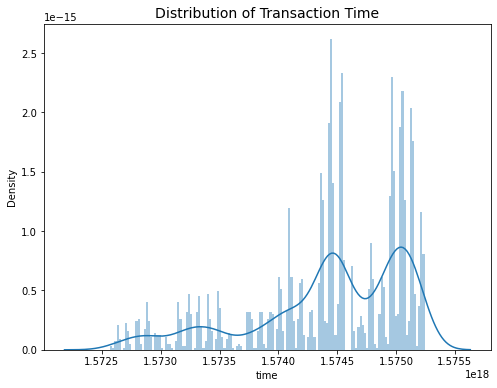

In [28]:
#time distribution
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=150)
plt.show()

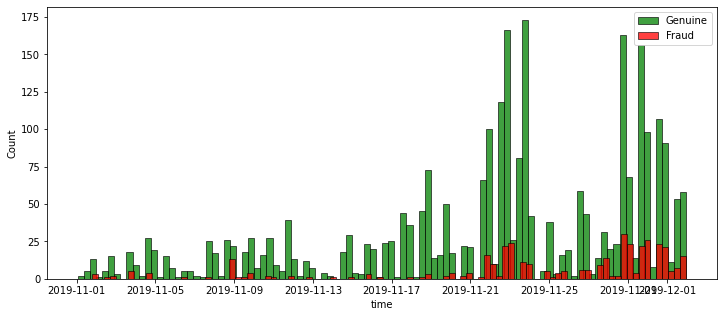

In [106]:
plt.figure(figsize=(12,5))


sns.histplot(df[(df['has_cbk'] == 0)]['time'], bins=100, color='green')  # Genuine - green

sns.histplot(df[(df['has_cbk'] == 1)]['time'], bins=100, color='red') # Fraudulent - Red'

plt.legend(['Genuine', 'Fraud'])
plt.show()

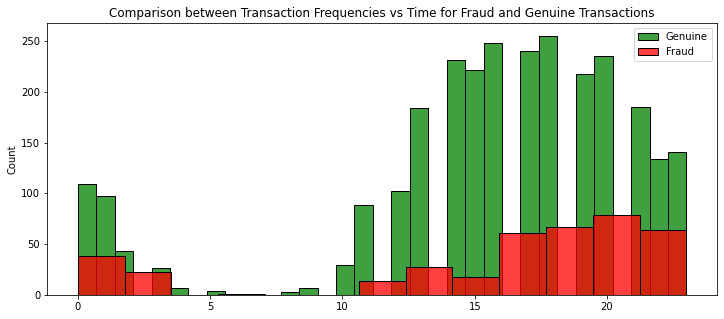

In [107]:
# Time plots 
#fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))
plt.figure(figsize=(12,5))

sns.histplot(df[df['has_cbk']==0]['hour'].values , color = 'green')  # Genuine - green
axs[0].set_title('Genuine Transactions')

sns.histplot(df[df['has_cbk']==1]['hour'].values , color = 'red') # Fraudulent - Red
axs[1].set_title('Fraud Transactions')
plt.legend(['Genuine', 'Fraud'])

plt.title('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

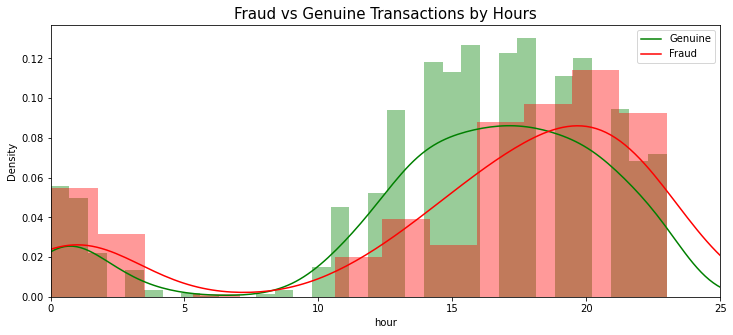

In [108]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Genuine Transactions

plt.figure(figsize=(12,5))

sns.distplot(df[df['has_cbk'] == 0]["hour"], color='green') # Genuine - green
sns.distplot(df[df['has_cbk'] == 1]["hour"], color='red') # Fraudulent - Red

plt.title('Fraud vs Genuine Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.legend(['Genuine', 'Fraud'])

plt.show()

**Highlights**

We see that the increase of frauds proportional to the increase of transactions. We consider this is a inherent risk to the the business. There is a lot of insights possible like, day of month or day of the week with more frequence that could increase the control awareness in this especifics days. 
We have only one month of data to explore, but can be observed that the frauds usually happen on the end of the month and between 05:00PM to 03:00AM. The hard part is the fact that this is a period in wich the transactions are still high.

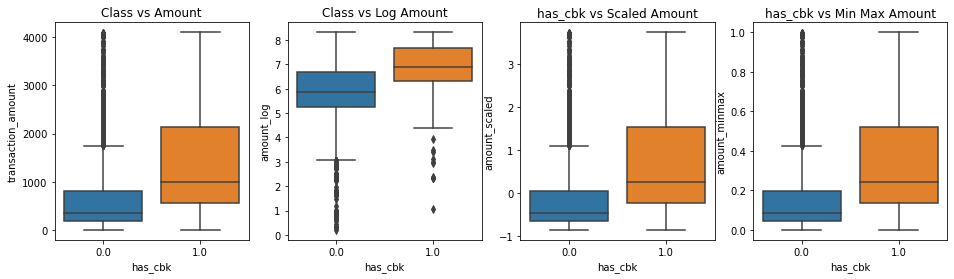

In [80]:
# Normalizing the values to get a better understanting.


import numpy as np
# Scale amount by log
# Adding a small amount of 0.0001 to amount as log of zero is infinite.
df['amount_log'] = np.log(df.transaction_amount + 0.0001)

from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled'] = ss.fit_transform(df['transaction_amount'].values.reshape(-1,1))

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['amount_minmax'] = mm.fit_transform(df['transaction_amount'].values.reshape(-1,1))

#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="has_cbk",y="transaction_amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="has_cbk",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="has_cbk",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("has_cbk vs Scaled Amount")

sns.boxplot(x ="has_cbk",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("has_cbk vs Min Max Amount")

plt.show()

In [147]:
df[['time','hour','date','transaction_amount','amount_log','amount_scaled','amount_minmax']]

time  hour        date  transaction_amount  \
0    2019-12-01 23:16:32.812632    23  2019-12-01              374.56   
1    2019-12-01 22:45:37.873639    22  2019-12-01              734.87   
2    2019-12-01 22:22:43.021495    22  2019-12-01              760.36   
3    2019-12-01 21:59:19.797129    21  2019-12-01             2556.13   
4    2019-12-01 21:30:53.347051    21  2019-12-01               55.36   
...                         ...   ...         ...                 ...   
3194 2019-11-01 13:05:34.054967    13  2019-11-01              744.15   
3195 2019-11-01 11:47:02.404963    11  2019-11-01             1403.67   
3196 2019-11-01 10:23:50.555604    10  2019-11-01                1.55   
3197 2019-11-01 01:29:45.799767     1  2019-11-01              359.68   
3198 2019-11-01 01:27:15.811098     1  2019-11-01             2416.70   

      amount_log  amount_scaled  amount_minmax  
0       5.925752      -0.442376       0.091148  
1       6.599694      -0.037058       0.179114  
2       6.633792      -0.008384       0.185337  
3       7.846250       2.011703       0.623759  
4       4.013859      -0.801448       0.013218  
...          ...            ...            ...  
3194    6.612243      -0.026619       0.181380  
3195    7.246846       0.715284       0.342396  
3196    0.438319      -0.861980       0.000081  
3197    5.885215      -0.459114       0.087515  
3198    7.790158       1.854856       0.589718  

[3199 rows x 7 columns]

In [76]:
#saving the dataset for future training or validation.

import pickle
import os

CloudWalkCleaned = df.copy()
# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CloudWalk.pkl', 'wb') as fileWriteStream:
    pickle.dump(CloudWalkCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: D:\1-PROJETO RUTGERS\Cloudwalk


In [93]:
df.has_cbk.value_counts()

0.0    2808
1.0     391
Name: has_cbk, dtype: int64

### Training the model

After the exploratory analysis, the next point is train the model. We will use the logatimic standardzation because has a better scale to understant de model, as well use for models get a better approuch in the prediction.

In [116]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [117]:
#dropping columns with colinearity, keeping only log amount normalized 
X = df.drop(['transaction_date','has_cbk','transaction_amount','amount_minmax','amount_scaled','time'],axis=1)
y = df['has_cbk']

In [118]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [119]:
X.head()

transaction_id  merchant_id  user_id card_number  device_id        date  \
0        21320398        29744    97051  4345059116   285475.0  20191201.0   
1        21320399        92895     2708  4444564210   497105.0  20191201.0   
2        21320400        47759    14777  4258507024       -1.0  20191201.0   
3        21320401        68657    69758  4642963991       -1.0  20191201.0   
4        21320402        54075    64367  6504876116   860232.0  20191201.0   

   hour  amount_log  
0    23    5.925752  
1    22    6.599694  
2    22    6.633792  
3    21    7.846250  
4    21    4.013859

In [120]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (2239, 8)
y_train -  (2239,)
X_test -  (960, 8)
y_test -  (960,)


Just for observation, it was used the training model without consider the unbalanced data. The results are not good.

In [121]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

y_pred = logreg.predict(X_test)

In [122]:
from sklearn import metrics

# https://en.wikipedia.org/wiki/Precision_and_recall
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       835
         1.0       0.00      0.00      0.00       125

    accuracy                           0.87       960
   macro avg       0.43      0.50      0.47       960
weighted avg       0.76      0.87      0.81       960



In [123]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.86979
AUC : 0.50000
Precision : 0.00000
Recall : 0.00000
F1 : 0.00000




In [124]:
pd.Series(y_pred).value_counts()

0.0    960
dtype: int64

In [125]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[835,   0],
       [125,   0]], dtype=int64)

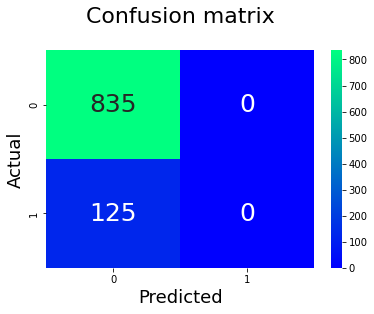

In [126]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [127]:
metrics.roc_auc_score(y_test , y_pred) 

0.5

In [128]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.88336174, 0.11663826],
       [0.87705907, 0.12294093],
       [0.88886383, 0.11113617],
       ...,
       [0.8888346 , 0.1111654 ],
       [0.87798382, 0.12201618],
       [0.88366275, 0.11633725]])

AUC -  0.5 



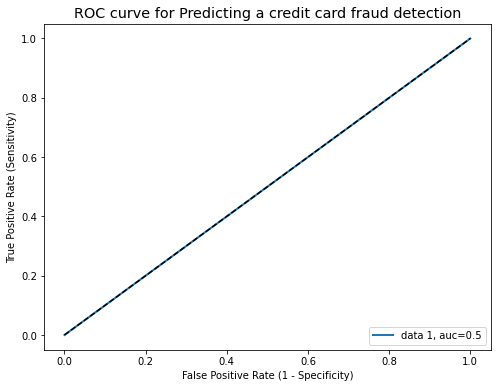

In [129]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.000


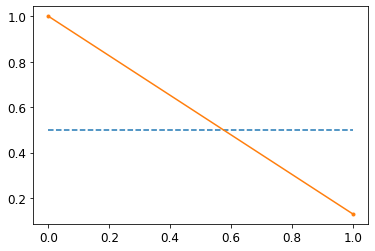

In [130]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

In [131]:
#treating with unbalanced data
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [132]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [133]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0.0: 1973, 1.0: 266})
Resampled dataset shape Counter({0.0: 266, 1.0: 266})


In [134]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [135]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))

Accuracy :0.86979
AUC : 0.50000
Precision : 0.00000
Recall : 0.00000
F1 : 0.00000


AUC -  0.5 



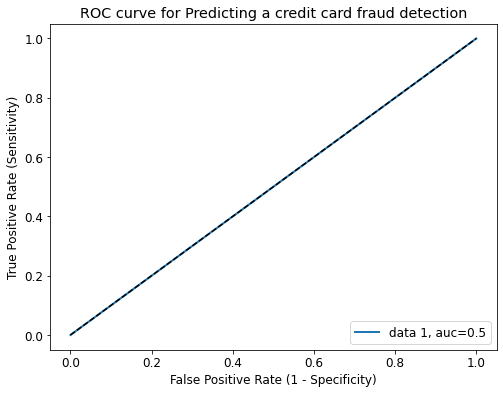

In [136]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.000


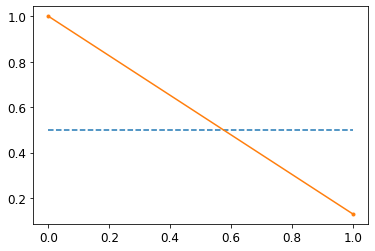

In [137]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

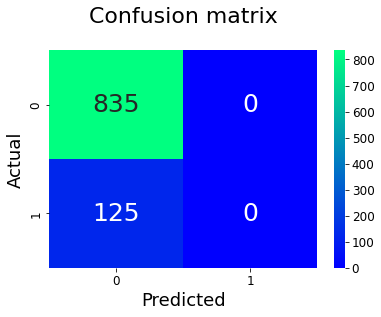

In [138]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [139]:
#1.3.Logistic Regression with Random Oversampling technique
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0.0: 1973, 1.0: 266})
Resampled dataset shape Counter({0.0: 1973, 1.0: 1973})


In [140]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [141]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))

Accuracy :0.61562
AUC : 0.53075
Precision : 0.14943
Recall : 0.41600
F1 : 0.21987


AUC -  0.530754491017964 



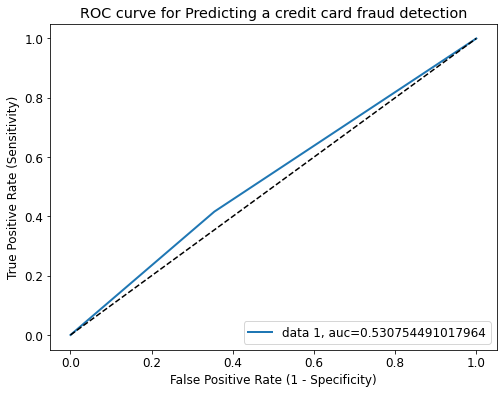

In [142]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.220


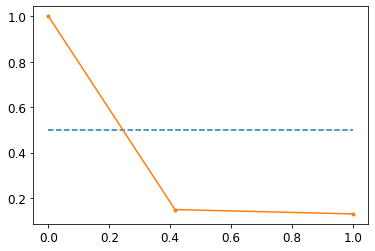

In [143]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

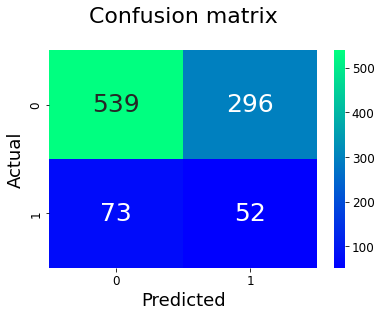

In [144]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [145]:
#logistic regression with smote
from imblearn.over_sampling import SMOTE, ADASYN

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0.0: 1973, 1.0: 266})
Resampled dataset shape Counter({0.0: 1973, 1.0: 1973})


In [146]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [147]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.61562
AUC : 0.53075
Precision : 0.14943
Recall : 0.41600
F1 : 0.21987


AUC -  0.530754491017964 



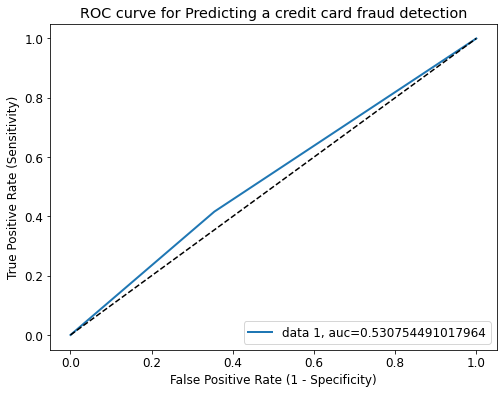

In [148]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.220


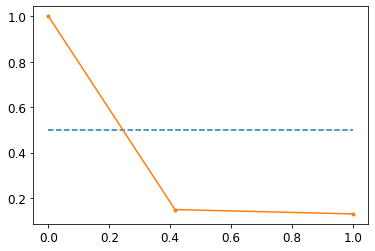

In [149]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

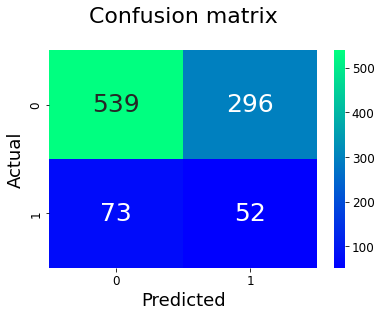

In [150]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [151]:
#LOGISTIC REGRESSION ADASYN

print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0.0: 1973, 1.0: 266})
Resampled dataset shape Counter({0.0: 1973, 1.0: 1962})


In [152]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [153]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :1.00000
AUC : 0.50000
Precision : 0.00000
Recall : 0.00000
F1 : 0.00000


AUC -  0.5 



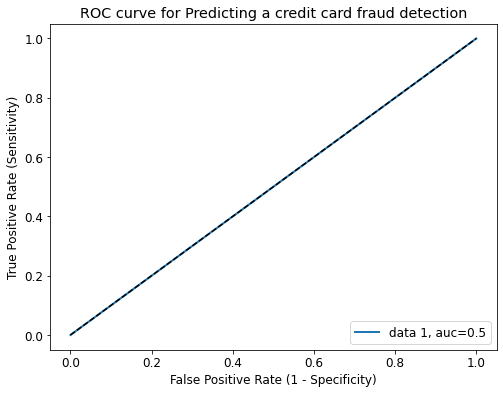

In [154]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.000


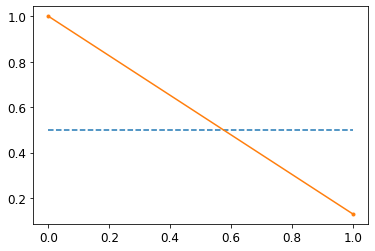

In [155]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

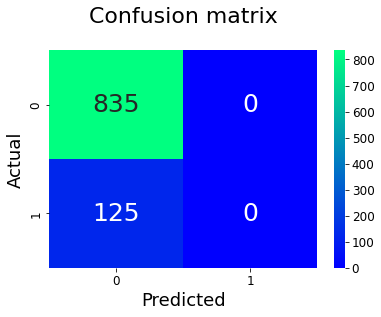

In [156]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [157]:
#SPATIAL NATURE OF CLASS IMBALANCE
from sklearn.decomposition import PCA

X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X_train)

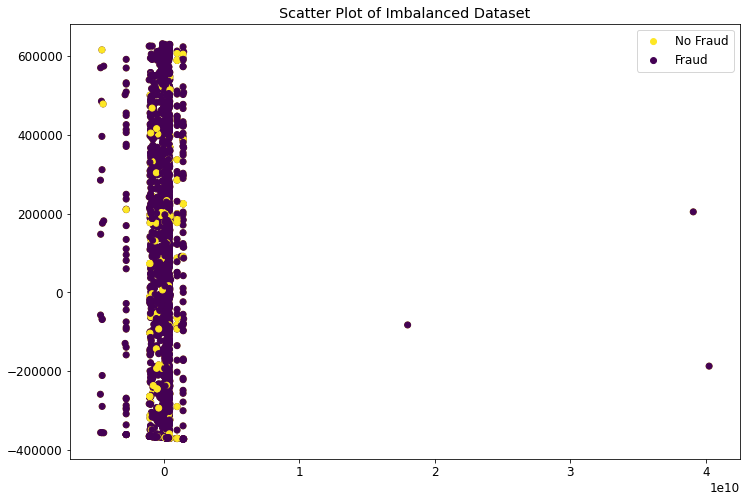

In [158]:
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 0), label='No Fraud', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y_train == 1), label='Fraud', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

In [159]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_smote)

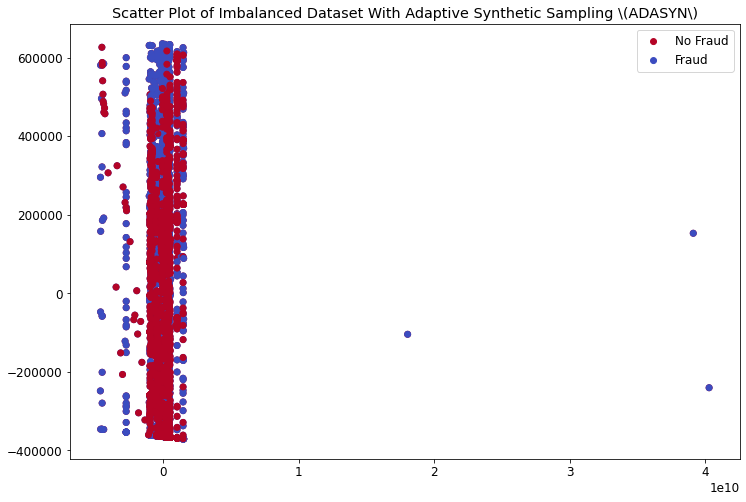

In [160]:
# Oversample and plot imbalanced dataset with ADASYN
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_smote == 0), cmap='coolwarm', label='No Fraud', linewidths=1)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train_smote == 1), cmap='coolwarm', label='Fraud', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset With Adaptive Synthetic Sampling \(ADASYN\)")
plt.legend()
plt.show()

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [173]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

Model Name : LR imbalance
Train Accuracy :0.88120
Test Accuracy :0.86979
Train AUC : 0.50000
Test AUC : 0.50000
Train Precision : 0.00000
Test Precision : 0.00000
Train Recall : 0.00000
Test Recall : 0.00000
Train F1 : 0.00000
Test F1 : 0.00000
Confusion Matrix : 
 [[835   0]
 [125   0]]


Model Name : LR Undersampling
Train Accuracy :0.51692
Test Accuracy :0.51979
Train AUC : 0.51692
Test AUC : 0.50968
Train Precision : 0.51779
Test Precision : 0.13478
Train Recall : 0.49248
Test Recall : 0.49600
Train F1 : 0.50482
Test F1 : 0.21197
Confusion Matrix : 
 [[437 398]
 [ 63  62]]


Model Name : LR Oversampling
Train Accuracy :0.53294
Test Accuracy :0.54792
Train AUC : 0.53294
Test AUC : 0.51564
Train Precision : 0.53439
Test Precision : 0.13817
Train Recall : 0.51191
Test Recall : 0.47200
Train F1 : 0.52291
Test F1 : 0.21377
Confusion Matrix : 
 [[467 368]
 [ 66  59]]


Model Name : LR SMOTE
Train Accuracy :0.51698
Test Accuracy :0.51458
Train AUC : 0.51698
Test AUC : 0.47607
Train Precis

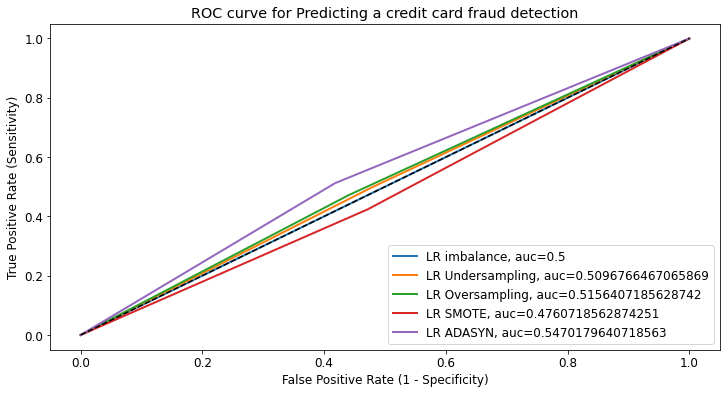

In [174]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'), X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :0.88229
Train AUC : 1.00000
Test AUC : 0.75887
Train Precision : 1.00000
Test Precision : 0.54412
Train Recall : 1.00000
Test Recall : 0.59200
Train F1 : 1.00000
Test F1 : 0.56705
Confusion Matrix : 
 [[773  62]
 [ 51  74]]


Model Name : DT Undersampling
Train Accuracy :1.00000
Test Accuracy :0.73750
Train AUC : 1.00000
Test AUC : 0.78108
Train Precision : 1.00000
Test Precision : 0.31157
Train Recall : 1.00000
Test Recall : 0.84000
Train F1 : 1.00000
Test F1 : 0.45455
Confusion Matrix : 
 [[603 232]
 [ 20 105]]


Model Name : DT Oversampling
Train Accuracy :1.00000
Test Accuracy :0.87813
Train AUC : 1.00000
Test AUC : 0.72247
Train Precision : 1.00000
Test Precision : 0.53333
Train Recall : 1.00000
Test Recall : 0.51200
Train F1 : 1.00000
Test F1 : 0.52245
Confusion Matrix : 
 [[779  56]
 [ 61  64]]


Model Name : DT SMOTE
Train Accuracy :1.00000
Test Accuracy :0.80208
Train AUC : 1.00000
Test AUC : 0.72637
Train Precis

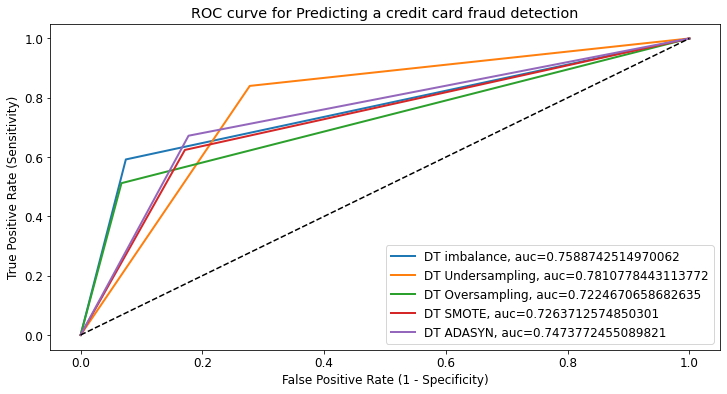

In [164]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :0.92188
Train AUC : 1.00000
Test AUC : 0.72721
Train Precision : 1.00000
Test Precision : 0.87879
Train Recall : 1.00000
Test Recall : 0.46400
Train F1 : 1.00000
Test F1 : 0.60733
Confusion Matrix : 
 [[827   8]
 [ 67  58]]


Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :0.79375
Train AUC : 1.00000
Test AUC : 0.82022
Train Precision : 1.00000
Test Precision : 0.37282
Train Recall : 1.00000
Test Recall : 0.85600
Train F1 : 1.00000
Test F1 : 0.51942
Confusion Matrix : 
 [[655 180]
 [ 18 107]]


Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :0.92917
Train AUC : 1.00000
Test AUC : 0.78242
Train Precision : 1.00000
Test Precision : 0.82022
Train Recall : 1.00000
Test Recall : 0.58400
Train F1 : 1.00000
Test F1 : 0.68224
Confusion Matrix : 
 [[819  16]
 [ 52  73]]


Model Name : RF SMOTE
Train Accuracy :1.00000
Test Accuracy :0.87813
Train AUC : 1.00000
Test AUC : 0.79729
Train Precis

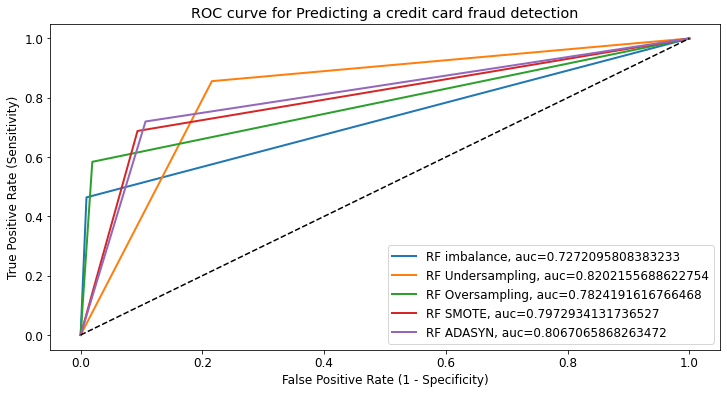

In [165]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

Model Name : KNN imbalance
Train Accuracy :0.90978
Test Accuracy :0.86042
Train AUC : 0.73414
Test AUC : 0.66467
Train Precision : 0.65686
Test Precision : 0.45872
Train Recall : 0.50376
Test Recall : 0.40000
Train F1 : 0.57021
Test F1 : 0.42735
Confusion Matrix : 
 [[776  59]
 [ 75  50]]


Model Name : KNN Undersampling
Train Accuracy :0.81203
Test Accuracy :0.68333
Train AUC : 0.81203
Test AUC : 0.69892
Train Precision : 0.80970
Test Precision : 0.25070
Train Recall : 0.81579
Test Recall : 0.72000
Train F1 : 0.81273
Test F1 : 0.37190
Confusion Matrix : 
 [[566 269]
 [ 35  90]]


Model Name : KNN Oversampling
Train Accuracy :0.93310
Test Accuracy :0.77604
Train AUC : 0.93310
Test AUC : 0.76582
Train Precision : 0.88267
Test Precision : 0.33813
Train Recall : 0.99899
Test Recall : 0.75200
Train F1 : 0.93723
Test F1 : 0.46650
Confusion Matrix : 
 [[651 184]
 [ 31  94]]


Model Name : KNN SMOTE
Train Accuracy :0.90091
Test Accuracy :0.79271
Train AUC : 0.90091
Test AUC : 0.74139
Train Pr

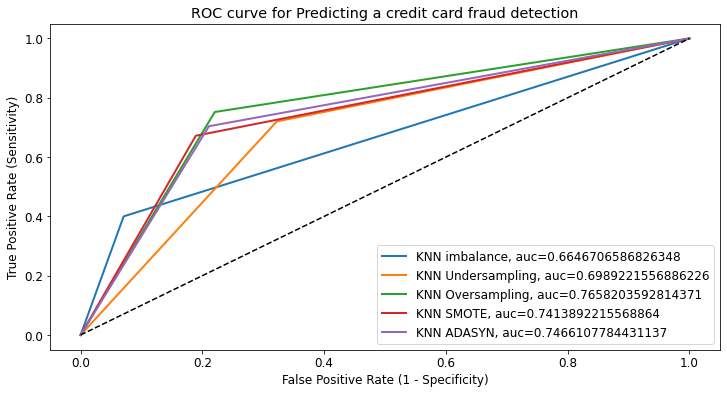

In [166]:
# #------------------ K-Nearest Neighbors (KNN) ------------------#
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

Model Name : SVM imbalance
Train Accuracy :0.99241
Test Accuracy :0.87708
Train AUC : 0.96805
Test AUC : 0.52800
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 0.93609
Test Recall : 0.05600
Train F1 : 0.96699
Test F1 : 0.10606
Confusion Matrix : 
 [[835   0]
 [118   7]]


Model Name : SVM Undersampling
Train Accuracy :0.98308
Test Accuracy :0.89167
Train AUC : 0.98308
Test AUC : 0.58400
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 0.96617
Test Recall : 0.16800
Train F1 : 0.98279
Test F1 : 0.28767
Confusion Matrix : 
 [[835   0]
 [104  21]]


Model Name : SVM Oversampling
Train Accuracy :0.96199
Test Accuracy :0.88646
Train AUC : 0.96199
Test AUC : 0.56400
Train Precision : 0.99945
Test Precision : 1.00000
Train Recall : 0.92448
Test Recall : 0.12800
Train F1 : 0.96051
Test F1 : 0.22695
Confusion Matrix : 
 [[835   0]
 [109  16]]


Model Name : SVM SMOTE
Train Accuracy :0.98049
Test Accuracy :0.89167
Train AUC : 0.98049
Test AUC : 0.58400
Train Pr

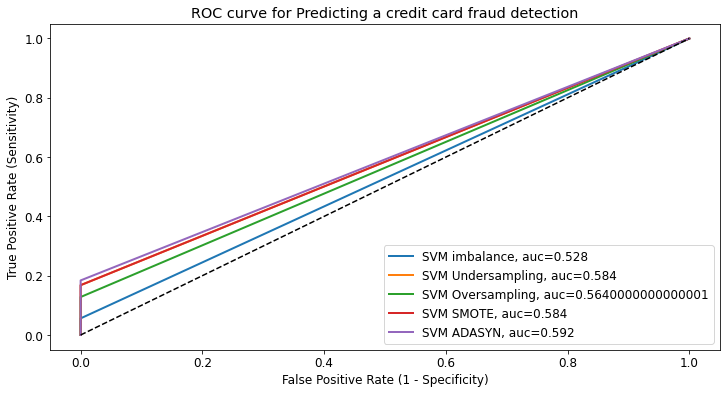

In [167]:
# #------------------ Support Vector Machines (SVM) ------------------#
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

Model Name : NB imbalance
Train Accuracy :0.88120
Test Accuracy :0.86979
Train AUC : 0.50000
Test AUC : 0.50000
Train Precision : 0.00000
Test Precision : 0.00000
Train Recall : 0.00000
Test Recall : 0.00000
Train F1 : 0.00000
Test F1 : 0.00000
Confusion Matrix : 
 [[835   0]
 [125   0]]


Model Name : NB Undersampling
Train Accuracy :0.53383
Test Accuracy :0.48750
Train AUC : 0.53383
Test AUC : 0.52853
Train Precision : 0.53309
Test Precision : 0.14230
Train Recall : 0.54511
Test Recall : 0.58400
Train F1 : 0.53903
Test F1 : 0.22884
Confusion Matrix : 
 [[395 440]
 [ 52  73]]


Model Name : NB Oversampling
Train Accuracy :0.49671
Test Accuracy :0.19792
Train AUC : 0.49671
Test AUC : 0.48790
Train Precision : 0.49817
Test Precision : 0.12717
Train Recall : 0.89812
Test Recall : 0.88000
Train F1 : 0.64087
Test F1 : 0.22222
Confusion Matrix : 
 [[ 80 755]
 [ 15 110]]


Model Name : NB SMOTE
Train Accuracy :0.50152
Test Accuracy :0.22187
Train AUC : 0.50152
Test AUC : 0.50168
Train Precis

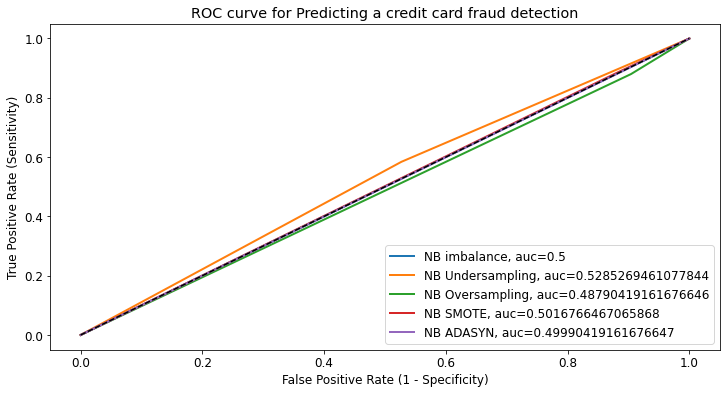

In [168]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodels.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
NBmodels.append(('NB Oversampling', GaussianNB(),X_train_ros,y_train_ros,X_test,y_test))
NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

In [169]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



Model  Accuracy_Test  AUC_Test  PrecisionScore_Test  \
12    RF Oversampling       0.929167  0.782419             0.820225   
10       RF imbalance       0.921875  0.727210             0.878788   
13           RF SMOTE       0.878125  0.797293             0.524390   
14          RF ADASYN       0.870833  0.806707             0.502793   
5        DT imbalance       0.882292  0.758874             0.544118   
7     DT Oversampling       0.878125  0.722467             0.533333   
11   RF Undersampling       0.793750  0.820216             0.372822   
9           DT ADASYN       0.803125  0.747377             0.362069   
17   KNN Oversampling       0.776042  0.765820             0.338129   
18          KNN SMOTE       0.792708  0.741389             0.347107   
6    DT Undersampling       0.737500  0.781078             0.311573   
19         KNN ADASYN       0.778125  0.746611             0.333333   
8            DT SMOTE       0.802083  0.726371             0.352941   
15      KNN imbalance       0.860417  0.664671             0.458716   
16  KNN Undersampling       0.683333  0.698922             0.250696   
24         SVM ADASYN       0.893750  0.592000             1.000000   
21  SVM Undersampling       0.891667  0.584000             1.000000   
23          SVM SMOTE       0.891667  0.584000             1.000000   
4           LR ADASYN       0.572917  0.547018             0.154964   
26   NB Undersampling       0.487500  0.528527             0.142300   
29          NB ADASYN       0.201042  0.499904             0.130184   
28           NB SMOTE       0.221875  0.501677             0.130641   
22   SVM Oversampling       0.886458  0.564000             1.000000   
27    NB Oversampling       0.197917  0.487904             0.127168   
2     LR Oversampling       0.547917  0.515641             0.138173   
1    LR Undersampling       0.519792  0.509677             0.134783   
3            LR SMOTE       0.514583  0.476072             0.118568   
20      SVM imbalance       0.877083  0.528000             1.000000   
0        LR imbalance       0.869792  0.500000             0.000000   
25       NB imbalance       0.869792  0.500000             0.000000   

    RecallScore_Test  F1Score_Test  
12             0.584      0.682243  
10             0.464      0.607330  
13             0.688      0.595156  
14             0.720      0.592105  
5              0.592      0.567050  
7              0.512      0.522449  
11             0.856      0.519417  
9              0.672      0.470588  
17             0.752      0.466501  
18             0.672      0.457766  
6              0.840      0.454545  
19             0.704      0.452442  
8              0.624      0.450867  
15             0.400      0.427350  
16             0.720      0.371901  
24             0.184      0.310811  
21             0.168      0.287671  
23             0.168      0.287671  
4              0.512      0.237918  
26             0.584      0.228840  
29             0.904      0.227593  
28             0.880      0.227508  
22             0.128      0.226950  
27             0.880      0.222222  
2              0.472      0.213768  
1              0.496      0.211966  
3              0.424      0.185315  
20             0.056      0.106061  
0              0.000      0.000000  
25             0.000      0.000000

**As a result, the Random forest with oversampling was the best method to predict in a production. Fist because has a high precision, wich means a small chance to hurt good costumers, and has a medium to high chance to grab the fraudster transaction.** 

## 3. Considering your conclusions, what would you further suggest in order to prevent frauds and/or chargebacks?

So, going to the end, when we use a model, it's important to observe the correct understand:

    - When the model says "fraud":
        - This is actually  a true positive(you found a fraud!)
        - This is evaluated as a false positive ( you´re hurting a good costumer)
    - Production model says "legit":
        - This is actually a false negative (uncaught fraud)
        - This is evaluate as a true negative(model correctly ignore)

As suggestions, I present bellow the mainly points for observations, due to his issue can't be all covered just in this notebook.

1- Sanity check:have a investigator to review a handful of suposed "false positives". We have to consider that: 

2- Improve the control awareness for the high level points as a rule based automatic control.
    
3- Graph Neural Networks(GNN) models for fraud detection: After attend the NeurIPS 2022 conference, in New Orleans-USA, I talked with other companies, especifically Amazon and Rappy, and both are using graphs neural networks to get more features from the potential network of the fraudster, and give more information to the model.
    
   With the message passing tool from GNN's, it possible to predict how the risk level of some nodes that are near to the fraudster, even in more of 2 levels of deepht in its his network.

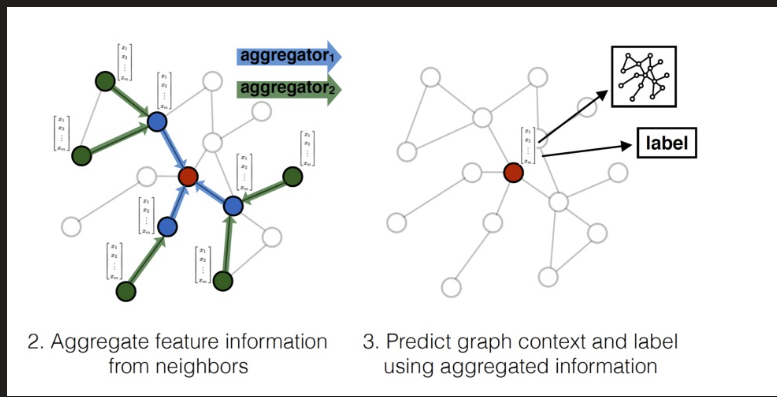